
<h2 Style= " color: #ff6347"> Proyecto; II Cuatrimestre  2023 </h2>

<p> Estudiante: Jose Andres Monge Montoya</p>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl #se usa para configurar graficos
import statsmodels.api as sm 

import datetime as datetime


df= pd.read_csv("DataSet.csv", sep=';')



/var/folders/1z/9tb6h1s5621cgygqrl5tt7g80000gn/T/ipykernel_1182/2523348157.py:10: DtypeWarning: Columns (5,6,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("DataSet.csv", sep=';')


<center> <h2 Style= " color: #ff6347"> Reviso cantidad de datos del archivo </h2> </center>

In [2]:
df.shape

(200015, 26)

<center> <h2 Style= " color: #ff6347"> Estandarización de datos </h2> </center>

In [3]:
df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [4]:
df.rename({'Serial Number': 'serialNumber'}, axis=1, inplace=True)
df.rename({'List Year': 'listYear'}, axis=1, inplace=True)
df.rename({'Date Recorded': 'dateRecorded'}, axis=1, inplace=True)
df.rename({'Town': 'town'}, axis=1, inplace=True)
df.rename({'Address': 'address'}, axis=1, inplace=True)
df.rename({'Assessed Value': 'assessedValue'}, axis=1, inplace=True)
df.rename({'Sale Amount': 'saleAmount'}, axis=1, inplace=True)
df.rename({'Sales Ratio': 'salesRatio'}, axis=1, inplace=True)
df.rename({'Property Type': 'propertyType'}, axis=1, inplace=True)
df.rename({'Residential Type': 'residentialType'}, axis=1, inplace=True)
df.rename({'Non Use Code': 'nonUseCode'}, axis=1, inplace=True)
df.rename({'Assessor Remarks': 'assessorRemarks'}, axis=1, inplace=True)
df.rename({'OPM Remarks': 'opmRemarks'}, axis=1, inplace=True)
df.rename({'Location': 'location'}, axis=1, inplace=True)

In [5]:
df.columns

Index(['serialNumber', 'listYear', 'dateRecorded', 'town', 'address',
       'assessedValue', 'saleAmount', 'salesRatio', 'propertyType',
       'residentialType', 'nonUseCode', 'assessorRemarks', 'OPM remarks',
       'location', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

<center> <h2 Style= " color: #ff6347"> Limpieza de datos</h2> </center>

In [6]:
df.isnull().sum() #funcion para valores faltantes

serialNumber            2
listYear                2
dateRecorded            4
town                    2
address                 6
assessedValue           2
saleAmount              4
salesRatio              4
propertyType       133211
residentialType    139002
nonUseCode         154232
assessorRemarks    185665
OPM remarks        197120
location           142920
Unnamed: 14        199530
Unnamed: 15        199830
Unnamed: 16        199950
Unnamed: 17        199985
Unnamed: 18        199997
Unnamed: 19        199998
Unnamed: 20        200000
Unnamed: 21        200001
Unnamed: 22        200001
Unnamed: 23        200002
Unnamed: 24        200014
Unnamed: 25        200011
dtype: int64

In [7]:
df["serialNumber"]= df["serialNumber"].fillna(df["serialNumber"].mean()) #borrar valores faltantes con mediana
df["listYear"]= df["listYear"].fillna(df["listYear"].mean())

In [8]:
df["salesRatio"] = pd.to_numeric(df["salesRatio"], errors='coerce')
promNormalizadas = df["salesRatio"].astype("float").mean(axis=0)

promsales_ratio = df["salesRatio"].astype("float").mean(axis=0)
df["salesRatio"].replace(np.nan, promsales_ratio, inplace=True)

In [9]:
df["propertyType"]=df["propertyType"].fillna(df["propertyType"].mode()[0]) #borrar valores faltantes con moda a cero
df["residentialType"]=df["residentialType"].fillna(df["residentialType"].mode()[0])
df["nonUseCode"]=df["nonUseCode"].fillna(df["nonUseCode"].mode()[0])
df["assessorRemarks"]=df["assessorRemarks"].fillna(df["assessorRemarks"].mode()[0])

In [10]:
df.drop(["OPM remarks","location","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20","Unnamed: 21","Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25"], axis=1,inplace=True)

<center> <h2 Style= " color: #ff6347"> Verificacion de datos faltantes eliminados</h2> </center>

In [11]:
df.isnull().sum()

serialNumber       0
listYear           0
dateRecorded       4
town               2
address            6
assessedValue      2
saleAmount         4
salesRatio         0
propertyType       0
residentialType    0
nonUseCode         0
assessorRemarks    0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

serialNumber       0
listYear           0
dateRecorded       0
town               0
address            0
assessedValue      0
saleAmount         0
salesRatio         0
propertyType       0
residentialType    0
nonUseCode         0
assessorRemarks    0
dtype: int64

In [14]:
df.shape

(200007, 12)

<center> <h2 Style= " color: #ff6347"> Cuadrar datos</h2> </center>

In [15]:
dfTemp = df.isnull()
for columna in dfTemp.columns.values.tolist():
    print(columna)
    print(dfTemp[columna].value_counts())
    print("")

serialNumber
False    200007
Name: serialNumber, dtype: int64

listYear
False    200007
Name: listYear, dtype: int64

dateRecorded
False    200007
Name: dateRecorded, dtype: int64

town
False    200007
Name: town, dtype: int64

address
False    200007
Name: address, dtype: int64

assessedValue
False    200007
Name: assessedValue, dtype: int64

saleAmount
False    200007
Name: saleAmount, dtype: int64

salesRatio
False    200007
Name: salesRatio, dtype: int64

propertyType
False    200007
Name: propertyType, dtype: int64

residentialType
False    200007
Name: residentialType, dtype: int64

nonUseCode
False    200007
Name: nonUseCode, dtype: int64

assessorRemarks
False    200007
Name: assessorRemarks, dtype: int64



<center> <h2 Style= " color: #ff6347"> Limpieza de datos de columna "Property Type"</h2> </center>

In [16]:
df["propertyType"].value_counts().idxmax
df["propertyType"].replace(np.nan,'Residential',inplace=True)

In [17]:
df["propertyType"] = df["propertyType"].replace(r'\d+', 'NaN', regex=True)#"r’(\d+)’" funcion que permite encontrar 1 o mas patrones en este caso se utiliza para hallar los caracteres sucios del DF"
caracteres = ['NaN N', 'NaN', 'NaN SUMMIT ST', 'NaN.NaN', 'NaN N', 'NaNA', 'NaNC SAW MILL', ' NaN N']
df["propertyType"].replace(caracteres,np.nan,inplace=True)
df.dropna(subset=["propertyType"], axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [18]:
pd.options.display.float_format = '{:.1f}'.format
df

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks
0,2020348.0,2020.0,09/13/2021,Ansonia,230 WAKELEE AVE,150500.00,325000.00,0.5,Commercial,Single Family,7.0,ESTATE SALE
1,20002.0,2020.0,10/2/20,Ashford,390 TURNPIKE RD,253000.00,430000.00,0.6,Residential,Single Family,7.0,ESTATE SALE
2,200212.0,2020.0,3/9/21,Avon,5 CHESTNUT DRIVE,130400.00,179900.00,0.7,Residential,Condo,7.0,ESTATE SALE
3,200243.0,2020.0,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.00,890000.00,0.7,Residential,Single Family,7.0,ESTATE SALE
4,200377.0,2020.0,7/2/21,Avon,70 FAR HILLS DRIVE,862330.00,1447500.00,0.6,Residential,Single Family,7.0,ESTATE SALE
...,...,...,...,...,...,...,...,...,...,...,...,...
199872,20763.0,2002.0,06/17/2003,West Haven,130 JONES ST,70700.0,179000.0,0.4,Residential,Single Family,7.0,ESTATE SALE
199873,21066.0,2002.0,07/22/2003,West Hartford,15 PORTER DR,240880.0,515000.0,0.5,Residential,Single Family,7.0,ESTATE SALE
199874,30531.0,2003.0,04/15/2004,East Hartford,43 TIFFANY RD,80330.0,130000.0,0.6,Residential,Single Family,14.0,ESTATE SALE
199875,30624.0,2003.0,3/3/04,Bristol,81 ANDREWS ST,69230.0,130000.0,0.5,Residential,Single Family,7.0,ESTATE SALE


<center> <h2 Style= " color: #0000ff"> Pregunta 1:  ¿Cuál es el ingreso anual de las propiedades vendidas?</h2> </center>

In [19]:
pd.options.display.float_format = '${:,.2f}'.format
df['listYear']= df['listYear'].astype("int")
df['saleAmount'] = pd.to_numeric(df['saleAmount'], errors='coerce')
df.dropna(subset=['saleAmount']) #pregunta numero 1
df.groupby(['listYear', 'propertyType'])['saleAmount'].sum()

listYear  propertyType  
2001      Residential      $14,671,503,335.00
2002      Residential      $17,100,395,037.00
2003      Residential       $5,583,694,049.00
2004      Residential             $381,000.00
2005      Residential          $22,689,557.00
2006      Condo                 $6,928,400.00
          Residential          $56,666,775.00
          Two Family              $110,000.00
2007      Condo                $10,271,915.00
          Residential          $22,807,521.00
2008      Condo                 $2,256,675.00
          Residential          $20,845,964.00
2009      Condo                 $4,001,640.00
          Residential          $25,596,387.00
2010      Condo                 $5,420,470.00
          Residential          $39,602,150.00
2011      Condo                 $2,872,450.00
          Residential          $27,764,500.00
2012      Condo                 $4,458,995.00
          Residential          $35,161,372.00
2013      Condo                 $2,735,900.00
         

<center> <h2 Style= " color: #0000ff"> Pregunta 2:  ¿Qué tipo de propiedad tiene mayor facilidad de venta??</h2> </center>

In [20]:
df.groupby(['propertyType','residentialType'])['saleAmount'].sum()

propertyType    residentialType
Apartments      Single Family      $6,169,096,772.00
Commercial      Single Family      $3,456,687,332.03
Condo           Condo                 $86,748,739.00
Industrial      Single Family        $411,997,723.00
Public Utility  Single Family          $1,848,544.00
Residential     Condo              $5,185,515,249.43
                Four Family           $85,079,505.00
                Single Family     $60,332,818,783.28
                Three Family         $602,838,287.68
                Two Family           $870,228,268.00
Single Family   Single Family            $530,000.00
Three Family    Three Family              $50,000.00
Two Family      Two Family               $395,000.00
Vacant Land     Single Family        $925,880,110.60
Name: saleAmount, dtype: float64

In [21]:
bf=df.groupby(["propertyType"]).count()
bf=bf.iloc[:8]
bf=bf.sort_values("saleAmount", ascending= False)
bf

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,residentialType,nonUseCode,assessorRemarks
propertyType,,,,,,,,,,,
Residential,193711,193711,193711,193711,193711,193711,193711,193711,193711,193711,193711
Commercial,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951
Apartments,478,478,478,478,478,478,478,478,478,478,478
Condo,371,371,371,371,371,371,371,371,371,371,371
Industrial,225,225,225,225,225,225,225,225,225,225,225
Public Utility,5,5,5,5,5,5,5,5,5,5,5
Single Family,2,2,2,2,2,2,2,2,2,2,2
Three Family,1,1,1,1,1,1,1,1,1,1,1


In [22]:

df['assessedValue'] = pd.to_numeric(df['assessedValue'], errors='coerce')
df.dropna(subset=['assessedValue'])

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks
0,"$2,020,348.00",2020,09/13/2021,Ansonia,230 WAKELEE AVE,"$150,500.00","$325,000.00",$0.46,Commercial,Single Family,$7.00,ESTATE SALE
1,"$20,002.00",2020,10/2/20,Ashford,390 TURNPIKE RD,"$253,000.00","$430,000.00",$0.59,Residential,Single Family,$7.00,ESTATE SALE
2,"$200,212.00",2020,3/9/21,Avon,5 CHESTNUT DRIVE,"$130,400.00","$179,900.00",$0.72,Residential,Condo,$7.00,ESTATE SALE
3,"$200,243.00",2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,"$619,290.00","$890,000.00",$0.70,Residential,Single Family,$7.00,ESTATE SALE
4,"$200,377.00",2020,7/2/21,Avon,70 FAR HILLS DRIVE,"$862,330.00","$1,447,500.00",$0.60,Residential,Single Family,$7.00,ESTATE SALE
...,...,...,...,...,...,...,...,...,...,...,...,...
199872,"$20,763.00",2002,06/17/2003,West Haven,130 JONES ST,"$70,700.00","$179,000.00",$0.39,Residential,Single Family,$7.00,ESTATE SALE
199873,"$21,066.00",2002,07/22/2003,West Hartford,15 PORTER DR,"$240,880.00","$515,000.00",$0.47,Residential,Single Family,$7.00,ESTATE SALE
199874,"$30,531.00",2003,04/15/2004,East Hartford,43 TIFFANY RD,"$80,330.00","$130,000.00",$0.62,Residential,Single Family,$14.00,ESTATE SALE
199875,"$30,624.00",2003,3/3/04,Bristol,81 ANDREWS ST,"$69,230.00","$130,000.00",$0.53,Residential,Single Family,$7.00,ESTATE SALE


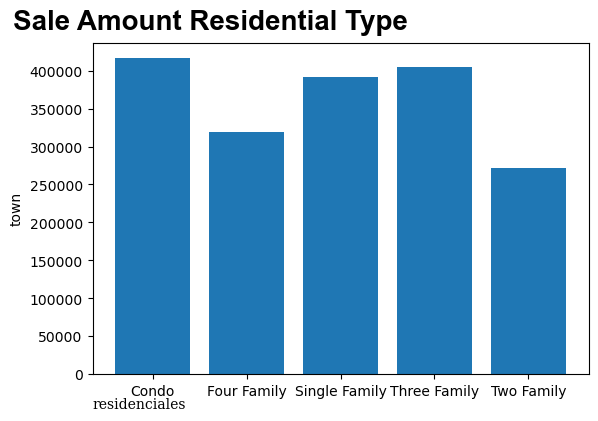

In [23]:
df['saleAmount'] = pd.to_numeric(df['saleAmount'], errors='coerce')

 

data = df.groupby(['residentialType'])['saleAmount'].mean()

 

fig, ax = plt.subplots()

 

eje_x = data.index.tolist()
eje_y = df['town']

 

ax.bar(eje_x,data)
ax.set_xlabel("residentialType")
ax.set_ylabel("town")

 
#FORMATO DEL TITULO

 
title = "Sale Amount Residential Type"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "arial")

#FORMATO AL EJE (X/Y)
etiqueta = "residenciales"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

 
ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 10)

 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 

plt.show()

In [24]:
df.groupby(['residentialType'])['saleAmount'].sum()

residentialType
Condo            $5,272,263,988.43
Four Family         $85,079,505.00
Single Family   $71,298,859,264.91
Three Family       $602,888,287.68
Two Family         $870,623,268.00
Name: saleAmount, dtype: float64

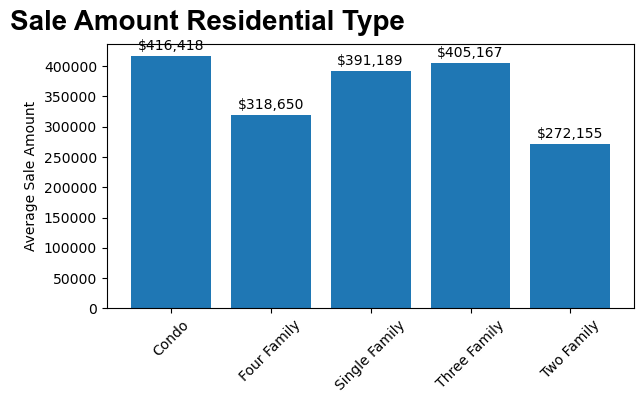

In [25]:
df['saleAmount'] = pd.to_numeric(df['saleAmount'], errors='coerce')

 
# Calcular el promedio de 'saleAmount' por tipo de residencial
data = df.groupby(['residentialType'])['saleAmount'].mean()

# Crear una figura y un eje
fig, ax = plt.subplots()

# Obtener los tipos de residencial para el eje x
eje_x = data.index.tolist()

# Crear barras para cada tipo de residencial
bars = ax.bar(eje_x, data)

# Etiquetas para los ejes x e y
ax.set_xlabel("Residential Type")
ax.set_ylabel("Average Sale Amount")

# Añadir etiquetas con los valores en las barras
for bar, value in zip(bars, data):
    ax.text(bar.get_x() + bar.get_width() / 2, value + 10000, f"${value:,.0f}",
            ha='center', color='black', fontsize=10)

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()       # Ajustar el diseño de la figura para evitar superposiciones

#FORMATO DEL TITULO

 
title = "Sale Amount Residential Type"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "arial")

#FORMATO AL EJE (X/Y)
etiqueta = ""
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

 
ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 10)

 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 

plt.show()


<center> <h2 Style= " color: #ff6347"> La propiedad con mayor facilidad de venta es Condo, se usa la columna saleamount para determinar la mayor cantidad de ventas por propiedad, determinando que es Condominio la propiedad</h2> </center>

<center> <h2 Style= " color: #0000ff"> Pregunta 3:  ¿En cuál ciudad o pueblo se dan mayor cantidad de ventas de
propiedades? Y ¿Qué elementos particulares tienen esas ciudades o
pueblos?</h2> </center>

In [26]:
gf= df.groupby(["town"]).count()#Respuesta 3
gf= gf.iloc[:8]
gf=gf.sort_values("saleAmount", ascending= False)
gf

,serialNumber,listYear,dateRecorded,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks
town,,,,,,,,,,,
Avon,1749,1749,1749,1749,1749,1749,1749,1749,1749,1749,1749
Berlin,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113
Ansonia,938,938,938,938,938,938,938,938,938,938,938
Bethany,533,533,533,533,533,533,533,533,533,533,533
Beacon Falls,416,416,416,416,416,416,416,416,416,416,416
Ashford,311,311,311,311,311,311,311,311,311,311,311
Barkhamsted,277,277,277,277,277,277,277,277,277,277,277
Andover,189,189,189,189,189,189,189,189,189,189,189


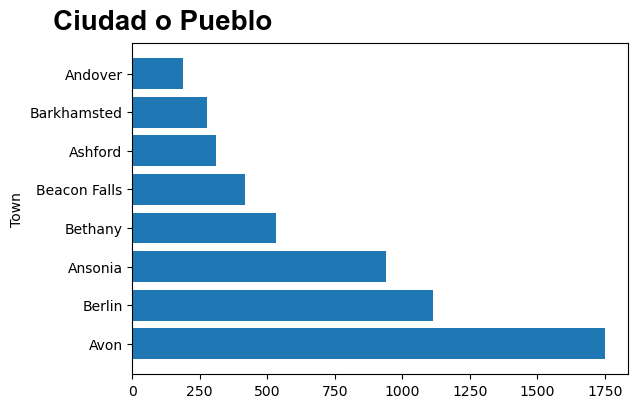

In [27]:
fig, ax= plt.subplots()

eje_x=gf.index.tolist()
data=gf["saleAmount"].tolist()


ax.barh(eje_x, data)
ax.set_xlabel("saleAmount")
ax.set_ylabel("Town")


#FORMATO DEL TITULO

 
title = "Ciudad o Pueblo"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "arial")

#FORMATO AL EJE (X/Y)
etiqueta = ""
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

 
ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 10)

 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 

plt.show()


<center> <h2 Style= " color: #ff6347"> En la ciudad Avon se da la mayor cantidad de ventas, y en la data no hay elementos suficientes para indicar qué factores median en la escigencia o preferencia de esta ciudad</h2> </center>

<center> <h2 Style= " color: #0000ff"> Pregunta 4:  ¿Cuál es el costo promedio de las propiedades residenciales y
comerciales?</h2> </center>

In [28]:
type = df.groupby(['propertyType'])['saleAmount'].mean()
resident = type['Residential']
comercia = type ['Commercial']

 

print("promedio residential:",resident)
print("promedio commercial:",comercia)

promedio residential: 346270.88855764514
promedio commercial: 1771751.5797180934


In [29]:
df["promedio_residential"]= resident
df["promedio_comercial"]= comercia     #respuesta 4
df

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,promedio_residential,promedio_comercial
0,"$2,020,348.00",2020,09/13/2021,Ansonia,230 WAKELEE AVE,"$150,500.00","$325,000.00",$0.46,Commercial,Single Family,$7.00,ESTATE SALE,"$346,270.89","$1,771,751.58"
1,"$20,002.00",2020,10/2/20,Ashford,390 TURNPIKE RD,"$253,000.00","$430,000.00",$0.59,Residential,Single Family,$7.00,ESTATE SALE,"$346,270.89","$1,771,751.58"
2,"$200,212.00",2020,3/9/21,Avon,5 CHESTNUT DRIVE,"$130,400.00","$179,900.00",$0.72,Residential,Condo,$7.00,ESTATE SALE,"$346,270.89","$1,771,751.58"
3,"$200,243.00",2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,"$619,290.00","$890,000.00",$0.70,Residential,Single Family,$7.00,ESTATE SALE,"$346,270.89","$1,771,751.58"
4,"$200,377.00",2020,7/2/21,Avon,70 FAR HILLS DRIVE,"$862,330.00","$1,447,500.00",$0.60,Residential,Single Family,$7.00,ESTATE SALE,"$346,270.89","$1,771,751.58"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199872,"$20,763.00",2002,06/17/2003,West Haven,130 JONES ST,"$70,700.00","$179,000.00",$0.39,Residential,Single Family,$7.00,ESTATE SALE,"$346,270.89","$1,771,751.58"
199873,"$21,066.00",2002,07/22/2003,West Hartford,15 PORTER DR,"$240,880.00","$515,000.00",$0.47,Residential,Single Family,$7.00,ESTATE SALE,"$346,270.89","$1,771,751.58"
199874,"$30,531.00",2003,04/15/2004,East Hartford,43 TIFFANY RD,"$80,330.00","$130,000.00",$0.62,Residential,Single Family,$14.00,ESTATE SALE,"$346,270.89","$1,771,751.58"
199875,"$30,624.00",2003,3/3/04,Bristol,81 ANDREWS ST,"$69,230.00","$130,000.00",$0.53,Residential,Single Family,$7.00,ESTATE SALE,"$346,270.89","$1,771,751.58"


<center> <h2 Style= " color: #ff6347"> El costo promedio de propiedades residenciales es $346,270.89,
y comerciales es $1,771,751.58</h2> </center>

<center> <h2 Style= " color: #0000ff"> Pregunta 5:  ¿Cuál es tipo de propiedades residenciales que se vende con mayor
frecuencia, donde y con que costo promedio?</h2> </center>

In [30]:
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

<center> <h2 Style= " color: #ff6347">Se muestra las dos propiedades residenciales, ciudades y el costo promedio</h2> </center>

In [31]:
df.groupby(['residentialType', 'town'])['saleAmount'].mean()

residentialType  town         
Condo            Ansonia         $170,709.09
                 Ashford          $79,900.00
                 Avon            $256,066.25
                 Beacon Falls    $325,662.24
                 Berlin          $274,507.67
                                     ...    
Two Family       Windsor Locks   $209,633.33
                 Wolcott         $244,200.00
                 Woodbridge      $286,250.00
                 Woodbury        $165,000.00
                 Woodstock       $205,000.00
Name: saleAmount, Length: 520, dtype: float64

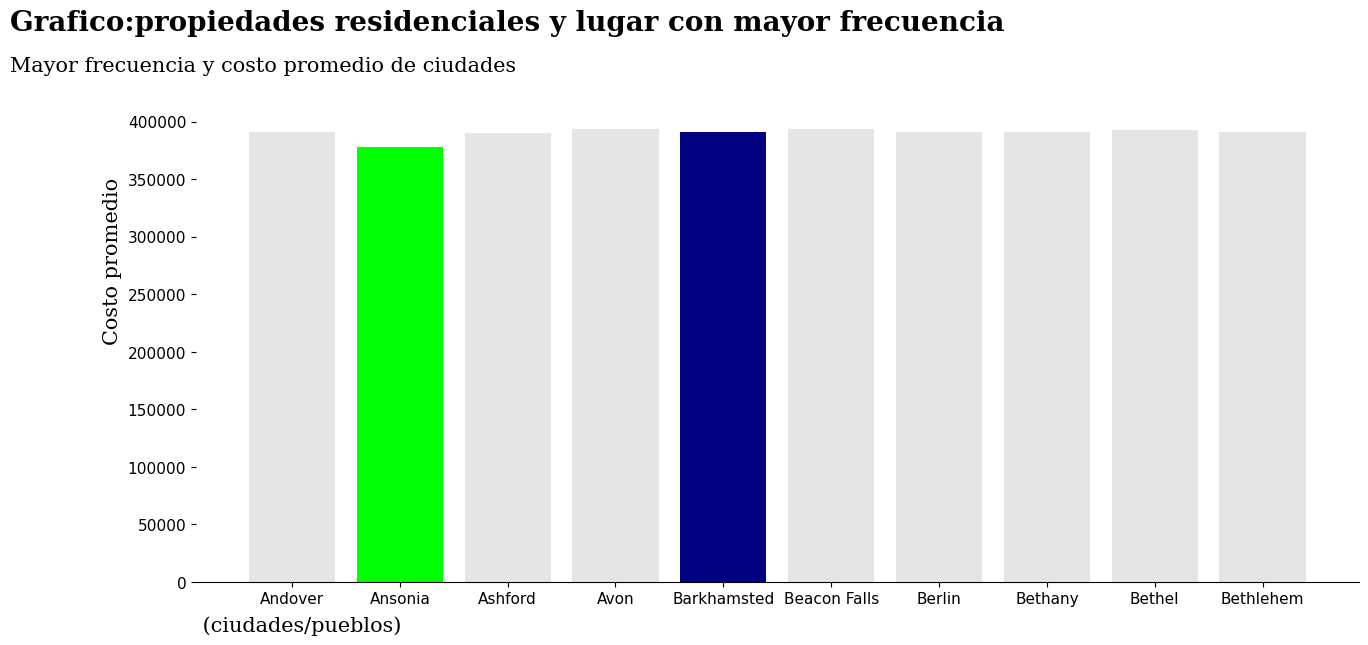

In [43]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)

result = df.groupby(['town'])['residential/saleAmount(norm)'].mean().reset_index()
resultados = result[:10]

eje_x = resultados['town'].tolist()

data = resultados['residential/saleAmount(norm)'].tolist()

bar_colors = ['#e5e5e5','#00FF00','#e5e5e5','#e5e5e5','#000080','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5']



ax.bar(eje_x, data, color=bar_colors)

 

#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 

title = "Grafico:propiedades residenciales y lugar con mayor frecuencia"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.94,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
,
             #fontname = "Liberation Sans Narrow"

#FORMATO DEL SUBTITULO
subTitle = "Mayor frecuencia y costo promedio de ciudades"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.85,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO AL EJE (X/Y)
etiqueta = " (ciudades/pueblos)"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 15,
              fontweight = "regular",
              fontfamily = "serif")

etiquetay = "Costo promedio"

ax.set_ylabel(etiquetay,

              ha = 'left',

              fontsize = 15,

              fontweight = "regular",

              fontfamily = "serif")


 

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 11)

 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 

plt.show()

In [33]:
df["residential/saleAmount(norm)"] = df.groupby("residentialType")["saleAmount"].transform("mean")
df["town(norm)"] = df.groupby("town")["residential/saleAmount(norm)"].transform("mean")



<center> <h2 Style= " color: #ff6347"> Se muestra el costo promedio de las residencias</h2> </center>

In [34]:
result = df.groupby(['residentialType', 'town'])['residential/saleAmount(norm)'].describe()
resultados = result[:10]
resultados

count        mean   std         min  \
residentialType town                                                 
Condo           Ansonia       $11.00 $416,417.66 $0.00 $416,417.66   
                Ashford        $1.00 $416,417.66   NaN $416,417.66   
                Avon         $184.00 $416,417.66 $0.00 $416,417.66   
                Beacon Falls  $54.00 $416,417.66 $0.00 $416,417.66   
                Berlin        $64.00 $416,417.66 $0.00 $416,417.66   
                Bethel       $160.00 $416,417.66 $0.00 $416,417.66   
                Bethlehem      $2.00 $416,417.66 $0.00 $416,417.66   
                Bloomfield    $80.00 $416,417.66 $0.00 $416,417.66   
                Branford     $347.00 $416,417.66 $0.00 $416,417.66   
                Bridgeport     $2.00 $416,417.66 $0.00 $416,417.66   

                                     25%         50%         75%         max  
residentialType town                                                          
Condo           Ansonia      $416,417.66 $416,417.66 $416,417.66 $416,417.66  
                Ashford      $416,417.66 $416,417.66 $416,417.66 $416,417.66  
                Avon         $416,417.66 $416,417.66 $416,417.66 $416,417.66  
                Beacon Falls $416,417.66 $416,417.66 $416,417.66 $416,417.66  
                Berlin       $416,417.66 $416,417.66 $416,417.66 $416,417.66  
                Bethel       $416,417.66 $416,417.66 $416,417.66 $416,417.66  
                Bethlehem    $416,417.66 $416,417.66 $416,417.66 $416,417.66  
                Bloomfield   $416,417.66 $416,417.66 $416,417.66 $416,417.66  
                Branford     $416,417.66 $416,417.66 $416,417.66 $416,417.66  
                Bridgeport   $416,417.66 $416,417.66 $416,417.66 $416,417.66

<center> <h2 Style= " color: #ff6347"> Los tipos residenciales que se venden más son Condominios (lugar; Ansonia, Avon, Ashfford...) y Two Family(Windsorlocks,Wolcot, Woodbrige...)</h2> </center>

<center> <h2 Style= " color: #0000ff"> Pregunta 6:  ¿Cuál es margen promedio de ganancia por cada una de las
propiedades vendidas?</h2> </center>

<center> <h2 Style= " color: #ff6347"> El margen de ganancia por cada propiedad es: </h2> </center>


In [35]:
df.groupby(["propertyType"])['salesRatio'].mean()

propertyType
Apartments        $34.59
Commercial        $60.58
Condo             $17.53
Industrial        $38.27
Public Utility   $200.29
Residential       $39.26
Single Family      $0.72
Three Family      $41.35
Two Family         $0.60
Vacant Land       $39.19
Name: salesRatio, dtype: float64

<center> <h2 Style= "color: #ff6347"> Public Utility es la que presenta mayor margen de ganancia </h2> </center>

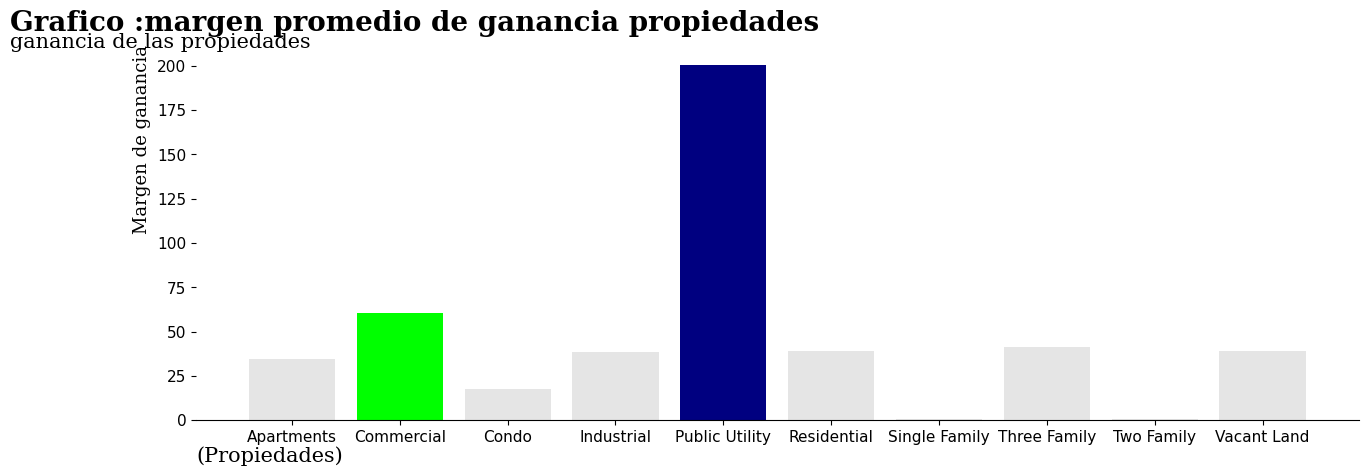

In [41]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,1, figsize =(15,5.4), dpi=100)

data = df.groupby(['propertyType'])['salesRatio'].mean()
eje_x = data.index.tolist()


 

bar_colors = ['#e5e5e5','#00FF00','#e5e5e5','#e5e5e5','#000080','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5']

 

ax.bar(eje_x, data, color=bar_colors)



#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 

title = "Grafico :margen promedio de ganancia propiedades"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
,
             #fontname = "Liberation Sans Narrow"

#FORMATO DEL SUBTITULO
subTitle = "Margen de ganancia de las propiedades"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO AL EJE (X/Y)
etiqueta = "(Propiedades)"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 15,
              fontweight = "regular",
              fontfamily = "serif")

etiquetay = "Margen de ganancia"

ax.set_ylabel(etiquetay,

              ha = 'left',

              fontsize = 13,

              fontweight = "regular",

              fontfamily = "serif")

 

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 11)

   

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

plt.show()

<center> <h2 Style= "color: #ff6347"> Public Utility es la que presenta mayor ganacia de propiedad </h2> </center>

<center> <h2 Style= " color: #0000ff"> Fin del proyecto </h2> </center>